# Data 102 Lecture 7 Demo

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

These are copied from last lecture:

In [2]:
FIGURE_SIZE = (6.5, 4.5)
def plot_prior_posterior(x, prior, posterior, xlim, 
                         prior_label, posterior_label,
                         x_map=None, x_lmse=None,
                        param_name: str = r'\theta'):
    
    plt.figure(figsize=FIGURE_SIZE, dpi=100)
    plt.plot(x, prior, lw=2.5, label = prior_label)
    plt.plot(x, posterior, lw=2.5, label = posterior_label)
    if x_map is not None:
        map_index = np.argmin(np.abs(x - x_map))
        posterior_map = posterior[map_index]
        label = f'MAP estimate: {x_map:0.2f}'
        plt.plot([x_map, x_map], [0, posterior_map], '--', lw=2.5, color='black', label=label)
    if x_lmse is not None:
        lmse_index = np.argmin(np.abs(x - x_lmse))
        posterior_lmse = posterior[lmse_index]
        label = f'LMSE estimate: {x_lmse:0.2f}'
        plt.plot([x_lmse, x_lmse], [0, posterior_lmse], '--', lw=1.5, color='red', label=label)
    #plt.legend(bbox_to_anchor=(1.32, 1.02))
    plt.legend()
    ymax = max(max(prior[np.isfinite(prior)]), max(posterior[np.isfinite(posterior)]))
    plt.ylim(-0.3, ymax+0.3)
    plt.xlim(*xlim)
    plt.xlabel(f'${param_name}$')
    plt.title(
        f'Prior $p({param_name})$ and posterior given observed data $x$: $p({param_name}|x)$'
    );
    
    
def plot_beta_prior_and_posterior(alpha, beta, pos_obs, neg_obs, show_map=False, show_lmse=False):   
    x = np.linspace(0, 1, 100)
    prior = stats.beta.pdf(x, alpha, beta)
    
    alpha_new = alpha + pos_obs
    beta_new = beta + neg_obs
    posterior = stats.beta.pdf(x, alpha_new, beta_new)
    
    # You never have to memorize these: when making this notebook,
    # I found them on the wikipedia page for the Beta distribution:
    # https://en.wikipedia.org/wiki/Beta_distribution

    if show_lmse:
        x_lmse = (alpha_new)/(alpha_new + beta_new)
    else:
        x_lmse = None
        
    if show_map:
        x_map = (alpha_new - 1) / (alpha_new + beta_new - 2)
    else:
        x_map = None
    plot_prior_posterior(x, prior, posterior, (-0.02, 1.02),
                         prior_label=f'Prior: Beta({alpha}, {beta})',
                         posterior_label=f'Posterior: Beta({alpha_new}, {beta_new})',
                         x_map=x_map, x_lmse=x_lmse)
    
# You don't need to understand how this function is implemented.

def plot_gaussian_prior_and_posterior(μ_0, σ_0, xs, σ, range_in_σs=3.5, show_map=False, show_lmse=False):
    """
    Plots prior and posterior Normaly distribution
    
    Args:
        μ_0, σ_0: parameters (mean, SD) of the prior distribution
        xs: list or array of observations
        σ: SD of the likelihood
        range_in_σs: how many SDs away from the mean to show on the plot
        show_map: whether or not to show the MAP estimate as a vertical line
        show_lmse: whether or not to show the LMSE/MMSE estimate as a vertical line
    """
    n = len(xs)
    posterior_σ = 1/np.sqrt(1/(σ_0**2) + n/(σ**2))
    posterior_mean = (posterior_σ**2) * (μ_0/(σ_0**2) + np.sum(xs)/(σ**2))
    
    # Compute range for plot
    posterior_min = posterior_mean - (range_in_σs * posterior_σ)
    posterior_max = posterior_mean + (range_in_σs * posterior_σ)
    prior_min = μ_0 - (range_in_σs * σ)
    prior_max = μ_0 + (range_in_σs * σ)
    
    xmin = min(posterior_min, prior_min)
    xmax = max(posterior_max, prior_max)
    x = np.linspace(xmin, xmax, 100)
    if show_lmse:
        x_lmse = posterior_mean
    else:
        x_lmse = None
        
    if show_map:
        x_map = posterior_mean
    else:
        x_map = None

    
    prior = stats.norm.pdf(x, μ_0, σ_0)
    posterior = stats.norm.pdf(x, posterior_mean, posterior_σ)
    
    
    plot_prior_posterior(x, prior, posterior, (xmin, xmax), 'Prior', 'Posterior',
                         x_map=x_map, x_lmse=x_lmse, param_name=r'\mu')


Let's look at the posterior and compare the two microwaves that way:

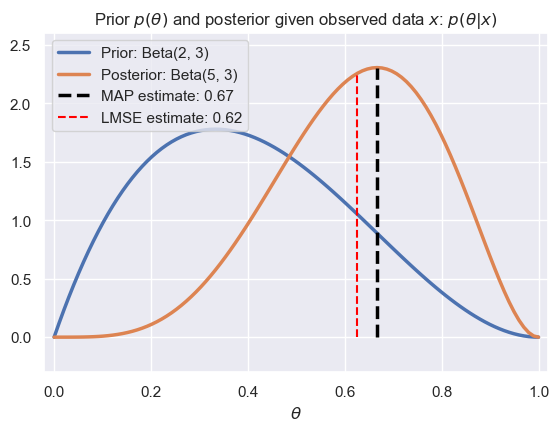

In [3]:
# Microwave A: 3 positive reviews, 0 negative reviews
plot_beta_prior_and_posterior(2, 3, 3, 0, show_map=True, show_lmse=True)


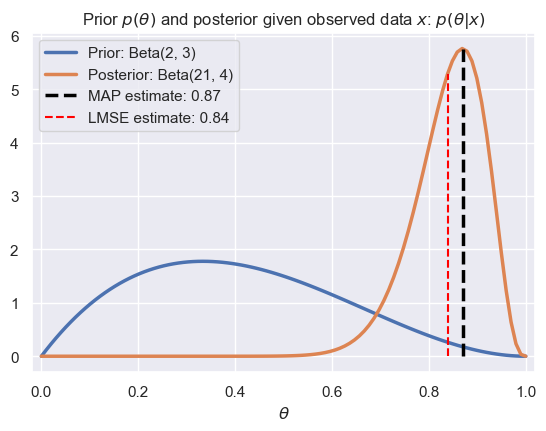

In [4]:
# Microwave B: 19 positive reviews, 1 negative reviews
plot_beta_prior_and_posterior(2, 3, 19, 1, show_map=True, show_lmse=True)


### Continuous example: heights

In [5]:
observed_heights = [6*12+0, 6*12+1, 5*12+9, 5*12+8]


Text(0.5, 0, '$\\mu$')

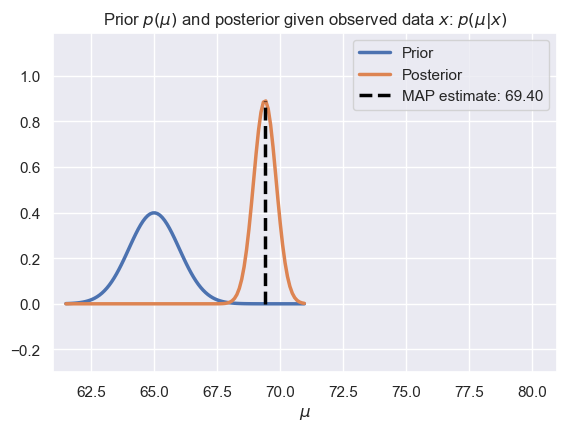

In [6]:
plot_gaussian_prior_and_posterior(5*12 + 5, 1, observed_heights, 1, show_map=True)
plt.xlim([61, 81])
plt.xlabel(r'$\mu$')

Text(0.5, 0, '$\\mu$')

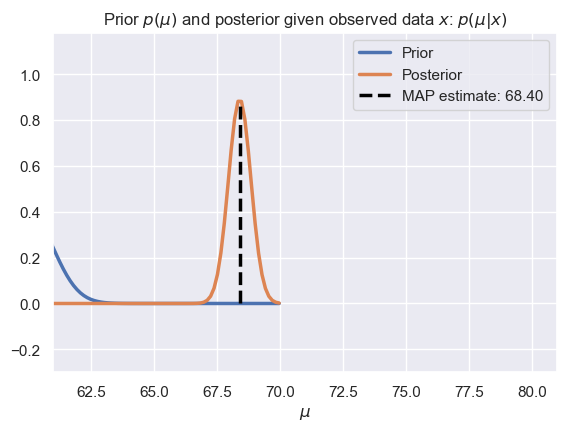

In [7]:
plot_gaussian_prior_and_posterior(5*12 + 0, 1, observed_heights, 1, show_map=True)
plt.xlim([61, 81])
plt.xlabel(r'$\mu$')

Text(0.5, 0, '$\\mu$')

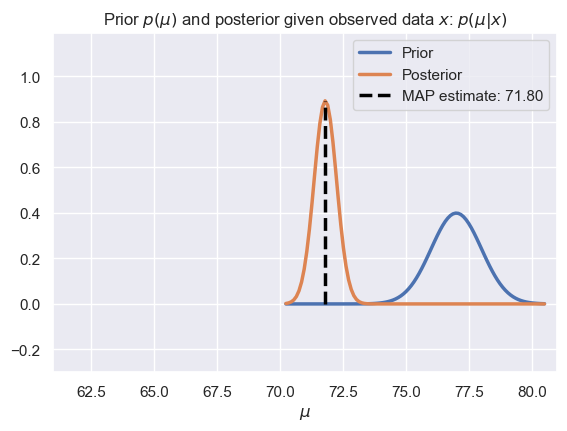

In [8]:
plot_gaussian_prior_and_posterior(6*12 + 5, 1, observed_heights, 1, show_map=True)
plt.xlim([61, 81])
plt.xlabel(r'$\mu$')

Text(0.5, 0, '$\\mu$')

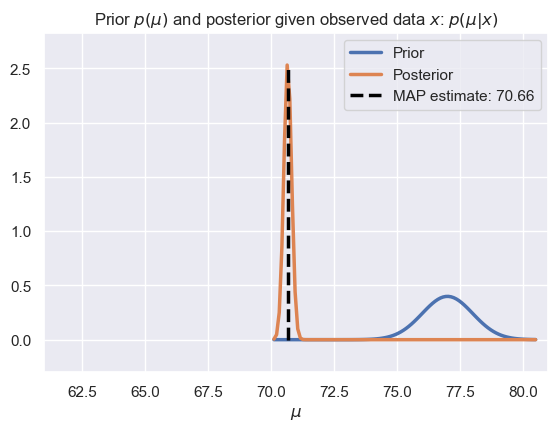

In [9]:
plot_gaussian_prior_and_posterior(6*12 + 5, 1, observed_heights * 10, 1, show_map=True)
plt.xlim([61, 81])
plt.xlabel(r'$\mu$')

## A more complex model: exoplanet sizes

Next, we'll look at a dataset of exoplanets: planets outside of our solar system. The `planets` dataframe contains information about 517 exoplanets from NASA. Can we use it to estimate which planets might be able to support life?

In [11]:
planets = pd.read_csv('exoplanets.csv')
planets.head()

,name,orbital_period,mass,radius,star_temperature,density
0,2MASS J21402931+1625183 A b,7336.500000,6657.910000,10.312188,2300.0,NaN
1,55 Cnc e,0.736539,8.078476,1.905513,5196.0,6.40
2,BD+20 594 b,41.685500,16.299962,2.230571,5766.0,7.89
3,CoRoT-1 b,1.508956,327.334000,16.701261,5950.0,0.38
4,CoRoT-10 b,13.240600,873.950000,10.872633,5075.0,3.70


It contains the following columns.
* `name`: the name of the exoplanet
* `orbital_period`: how many days it takes for the planet to orbit its star 
* `mass`: the mass of the planet, in multiples of Earth's mass (e.g., the second planet, 55 Cnc e, has a mass 73.6% of Earth's)
* `radius`: the radius of the planet, in multiples of Earth's radius (e.g., the second planet, 55 Cnc e, has a radius almost twice the size of Earth's)
* `star_temperature`: the temperature of the star that the planet orbits, in Kelvin
* `density`: the density of the planet, in g/cm^3

Note that in astronomy, it's more common to measure mass and radius in terms of the planet Jupiter rather than Earth (Jupiter is about 11 times the radius of earth and about 317 times the mass), but we're using Earth-based measurements since we're going to use Earth as a standard for habitability.

In [12]:
planets.shape

(517, 6)

<AxesSubplot:xlabel='radius', ylabel='Density'>

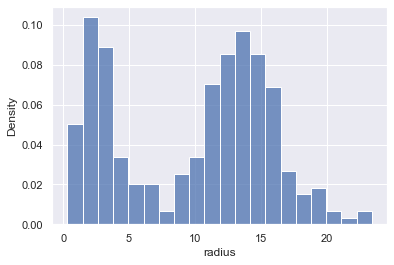

In [13]:
sns.histplot(data=planets, x='radius', stat='density', bins=20)

In [14]:
planets['radius'].mean()

9.841370838684712

Gaussian likelihood is not a good fit: the observations have two modes.

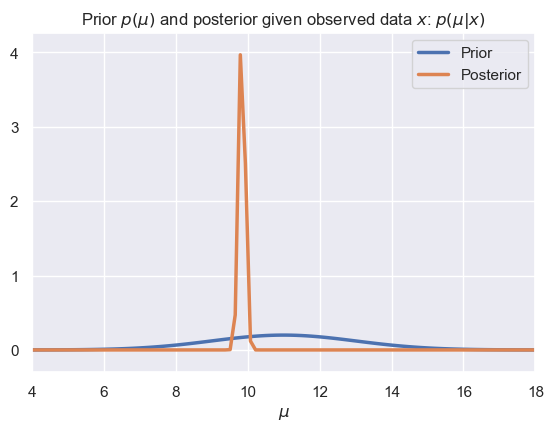

In [15]:
plot_gaussian_prior_and_posterior(11, 2, planets['radius'], 2)

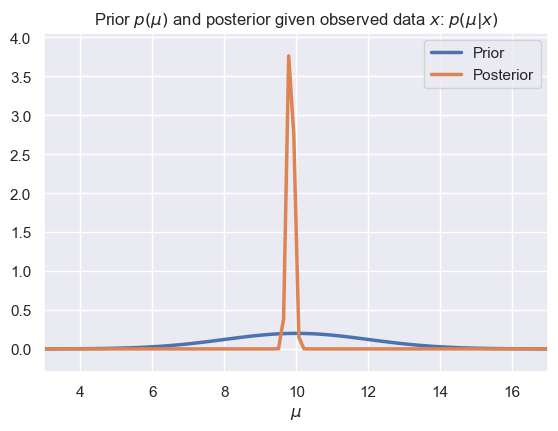

In [16]:
plot_gaussian_prior_and_posterior(10, 2, planets['radius'], 2)

(-0.5, 24.0)

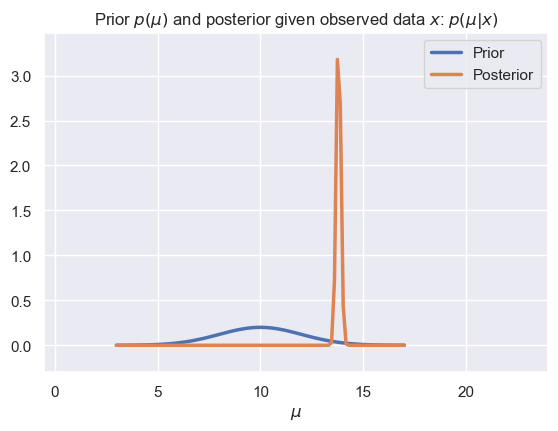

In [17]:
plot_gaussian_prior_and_posterior(10, 2, planets.loc[planets['radius'] > 7.5, 'radius'], 2)
plt.xlim([-0.5, 24])

## PyMC3

We spent a lot of time doing algebra and computation for the review model. At this point, you might be asking: couldn't we do a lot of that work computationally? It turns out the answer is yes! PyMC3 is a Python library for Bayesian inference. You specify a probabilistic model (like the three we've just seen), and it will compute the posterior distribution over all unknown variables. 

Let's try it out on the product review model:

$$
\begin{align}
    x_i | \theta  &\sim \mathrm{Bernoulli}(\theta) \\
    \theta &\sim \mathrm{Beta}(\alpha, \beta)
\end{align}
$$

We'll start by specifying our data: Microwave A has 3 positive reviews and 0 negative reviews, and Microwave B has 19 positive reviews and 1 negative review.

In [18]:
reviews_a = np.array([1, 1, 1])
reviews_b = np.array([1] * 19 + [0])

Next, we define the model and compute the posterior. Here's what it looks like:

In [19]:
import pymc3 as pm
import arviz as az

# Parameters of the prior
alpha = 2
beta = 3

# PyMC3 models should be specified inside a `with pm.Model() as ...:` block, like so:
with pm.Model() as model:
    # Define a Beta-distributed random variable called theta
    theta = pm.Beta('theta', alpha=alpha, beta=beta)
    
    # Defines a Bernoulli RV called x. Since x is observed, we
    # pass in the observed= argument to provide our data
    x = pm.Bernoulli('x', p=theta, observed=reviews_b)
    
    # This line asks PyMC3 to approximate the posterior.
    # Don't worry too much about how it works for now.
    trace = pm.sample(2000, chains=2, tune=1000, return_inferencedata=True)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [theta]


Sampling 2 chains for 1_000 tune and 2_000 draw iterations (2_000 + 4_000 draws total) took 16 seconds.


In [20]:
trace

Inference data with groups:
	> posterior
	> log_likelihood
	> sample_stats
	> observed_data

In [21]:
trace.posterior

<xarray.Dataset>
Dimensions:  (chain: 2, draw: 2000)
Coordinates:
  * chain    (chain) int64 0 1
  * draw     (draw) int64 0 1 2 3 4 5 6 7 ... 1993 1994 1995 1996 1997 1998 1999
Data variables:
    theta    (chain, draw) float64 0.9013 0.8562 0.8671 ... 0.8361 0.8383 0.8383
Attributes:
    created_at:                 2023-02-07T17:14:48.026089
    arviz_version:              0.11.4
    inference_library:          pymc3
    inference_library_version:  3.11.4
    sampling_time:              15.671641111373901
    tuning_steps:               1000

In [22]:
trace.posterior['theta']

<xarray.DataArray 'theta' (chain: 2, draw: 2000)>
array([[0.90126475, 0.85619439, 0.86712316, ..., 0.90331793, 0.83829666,
        0.83829666],
       [0.84410879, 0.83955233, 0.83955233, ..., 0.83612317, 0.83825958,
        0.83825958]])
Coordinates:
  * chain    (chain) int64 0 1
  * draw     (draw) int64 0 1 2 3 4 5 6 7 ... 1993 1994 1995 1996 1997 1998 1999

(array([  1.,   2.,   1.,   8.,  15.,  17.,  34.,  53.,  83., 172., 203.,
        289., 390., 530., 596., 617., 473., 332., 159.,  25.]),
 array([0.49231812, 0.5172893 , 0.54226047, 0.56723165, 0.59220282,
        0.617174  , 0.64214517, 0.66711635, 0.69208752, 0.7170587 ,
        0.74202987, 0.76700105, 0.79197222, 0.8169434 , 0.84191457,
        0.86688575, 0.89185692, 0.9168281 , 0.94179927, 0.96677045,
        0.99174162]),
 <BarContainer object of 20 artists>)

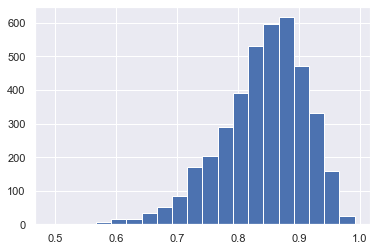

In [23]:
plt.hist(trace.posterior['theta'].values.flatten(), bins=20)